In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import train_test_split

from sklearn import datasets, metrics, model_selection

#from data import *
from helpers import *


In [34]:
# Automated way to create labeled dataset
#directory='/../data_gated/'
#columns=['FSC-H', 'SSC-H', 'B530-H', 'B572-H', 'B675-H']
#create_labeled_dataset(directory,columns,label_gated=3,label_not_gated=1)

In [35]:
file = '../labeled_dataset/GL59_DN_2A.csv'
columns=['B530-H', 'B530-A','B675-H','B572-H','Width']
X,y = preprocess(file,columns)

../labeled_dataset/GL59_DN_2A.csv


In [36]:
def proportional_train_test_split(X, y, test_size=0.2, random_state=0):
    #find all y==1 and y==0
    X['y'] = y.copy()
    X_1 = X[X['y']==1]
    y_1 = X_1['y']
    X_1 = X_1.drop(['y'],axis=1)
    X_not1 = X[X['y']!=1]
    y_not1 = X_not1['y']
    X_not1 = X_not1.drop(['y'],axis=1)
    
    #split in each sample
    X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=test_size, random_state=random_state)
    X_not1_train, X_not1_test, y_not1_train, y_not1_test = train_test_split(X_not1, y_not1, test_size=test_size, random_state=random_state)
    
    #merge them together
    X_final_train = X_1_train.append(X_not1_train, ignore_index = True)
    X_final_test = X_1_test.append(X_not1_test, ignore_index = True)
    y_final_train = y_1_train.append(y_not1_train, ignore_index = True)
    y_final_test = y_1_test.append(y_not1_test, ignore_index = True)
    
    return X_final_train, X_final_test, y_final_train, y_final_test



In [37]:
X_train, X_test, y_train, y_test = proportional_train_test_split(X,y)

In [38]:
kfold_cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)

In [39]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [41]:
# Example of a cross-validation scenario 
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=kfold_cv, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=kfold_cv, scoring='balanced_accuracy')
print("Balanced Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=kfold_cv, scoring='f1')
print("F1: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=kfold_cv, scoring='roc_auc')
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))


# Example for a training-test split
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f" % (metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1: %.3f" % (metrics.f1_score(y_test, y_pred)))
print("AUC: %.3f" % (metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 1.000 (0.000)
Balanced Accuracy: 1.000 (0.000)
F1: 1.000 (0.000)
AUC: 1.000 (0.000)
Accuracy: 0.986
Balanced Accuracy: 0.985
F1: 0.980
AUC: 0.985


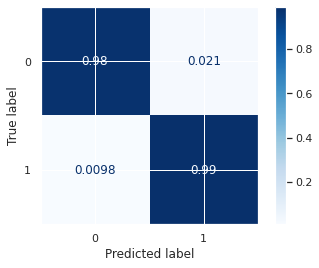

In [42]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');

../labeled_dataset/GL53_UP_1A.csv
Accuracy: 0.653
Balanced Accuracy: 0.686
F1: 0.628
../labeled_dataset/GL53_UP_2A.csv
Accuracy: 0.672
Balanced Accuracy: 0.680
F1: 0.624
../labeled_dataset/GL53_UP_3A.csv
Accuracy: 0.772
Balanced Accuracy: 0.789
F1: 0.740
../labeled_dataset/GL55_DN_3A.csv
Accuracy: 0.111
Balanced Accuracy: 0.177
F1: 0.199
../labeled_dataset/GL57_DN_3A.csv
Accuracy: 0.948
Balanced Accuracy: 0.947
F1: 0.925
../labeled_dataset/GL57_DN_2A.csv
Accuracy: 0.943
Balanced Accuracy: 0.942
F1: 0.935
../labeled_dataset/GL58_UP_1A.csv
Accuracy: 0.567
Balanced Accuracy: 0.604
F1: 0.536
../labeled_dataset/GL58_UP_2A.csv
Accuracy: 0.950
Balanced Accuracy: 0.950
F1: 0.930
../labeled_dataset/GL58_UP_3A.csv
Accuracy: 0.946
Balanced Accuracy: 0.945
F1: 0.916
../labeled_dataset/GL59_DN_1A.csv
Accuracy: 0.963
Balanced Accuracy: 0.965
F1: 0.951
../labeled_dataset/GL59_DN_2A.csv
Accuracy: 0.997
Balanced Accuracy: 0.997
F1: 0.996
../labeled_dataset/GL59_DN_3A.csv
Accuracy: 0.970
Balanced Accura

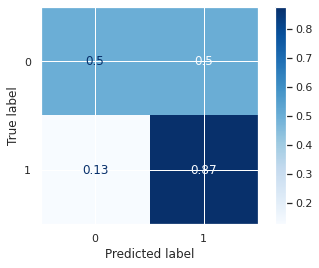

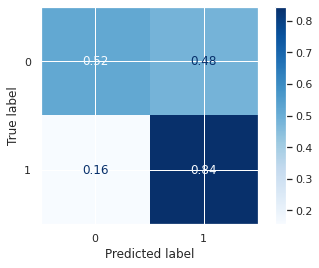

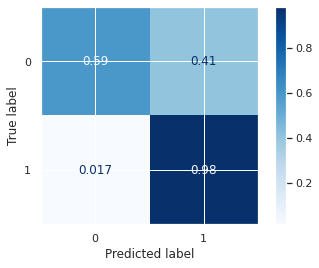

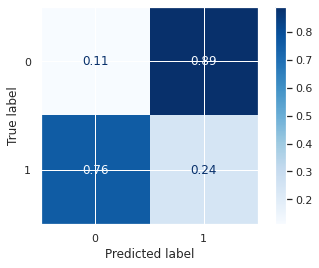

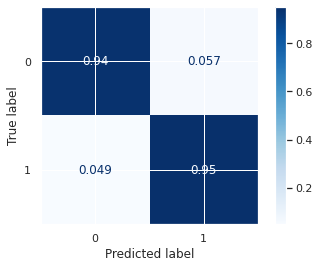

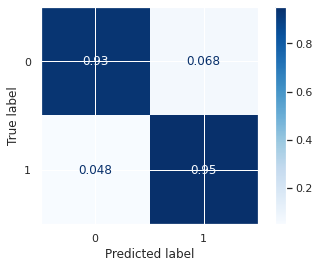

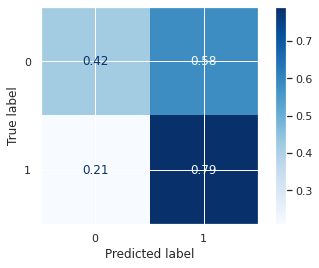

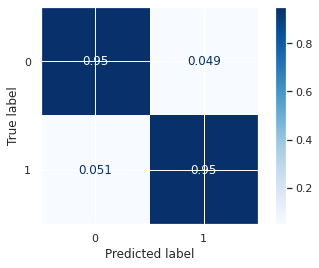

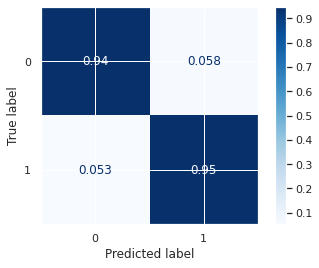

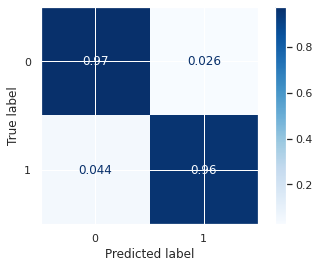

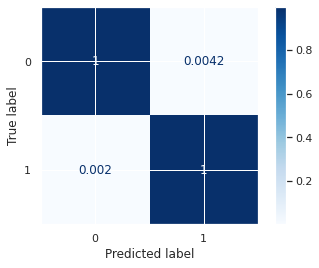

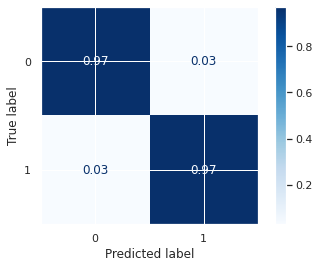

In [63]:
files = ['../labeled_dataset/GL53_UP_1A.csv','../labeled_dataset/GL53_UP_2A.csv','../labeled_dataset/GL53_UP_3A.csv','../labeled_dataset/GL55_DN_3A.csv',
        '../labeled_dataset/GL57_DN_3A.csv','../labeled_dataset/GL57_DN_2A.csv','../labeled_dataset/GL58_UP_1A.csv','../labeled_dataset/GL58_UP_2A.csv',
        '../labeled_dataset/GL58_UP_3A.csv','../labeled_dataset/GL59_DN_1A.csv','../labeled_dataset/GL59_DN_2A.csv','../labeled_dataset/GL59_DN_3A.csv']
#file = '../labeled_dataset/GL53_UP_3A.csv'
columns=['B530-H', 'B530-A','B675-H','B572-H','Width']

for file in files:
    
    X_file,y_file = preprocess(file,columns)

    y_pred_file = model.predict(X_file)
    metrics.plot_confusion_matrix(model, X_file, y_file, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');
    print("Accuracy: %.3f" % (metrics.accuracy_score(y_file, y_pred_file)))
    print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_file, y_pred_file)))
    print("F1: %.3f" % (metrics.f1_score(y_file, y_pred_file)))

### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state= 0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [65]:
forest.feature_importances_

array([0.26220792, 0.28986159, 0.2459903 , 0.10787196, 0.09406823])

In [66]:
forest.predict(X_test)

array([1, 1, 1, ..., 2, 2, 2])

In [67]:
forest.predict_proba(X_test)

array([[0.9, 0.1],
       [0.7, 0.3],
       [1. , 0. ],
       ...,
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ]])

In [68]:
# Example of a cross-validation scenario 
results = model_selection.cross_val_score(RandomForestClassifier(random_state=0), X, y, cv=kfold_cv, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(RandomForestClassifier(random_state=0), X, y, cv=kfold_cv, scoring='balanced_accuracy')
print("Balanced Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(RandomForestClassifier(random_state=0), X, y, cv=kfold_cv, scoring='f1')
print("F1: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(RandomForestClassifier(random_state=0), X, y, cv=kfold_cv, scoring='roc_auc')
print("F1: %.3f (%.3f)" % (results.mean(), results.std()))


# Example for a training-test split
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f" % (metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1: %.3f" % (metrics.f1_score(y_test, y_pred)))
print("AUC: %.3f" % (metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 1.000 (0.000)
Balanced Accuracy: 1.000 (0.000)
F1: 1.000 (0.000)
F1: 1.000 (0.000)
Accuracy: 0.987
Balanced Accuracy: 0.984
F1: 0.981
AUC: 0.984


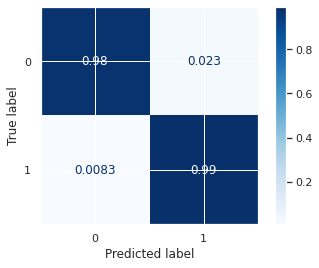

In [69]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');

../labeled_dataset/GL53_UP_1A.csv
Accuracy: 0.654
Balanced Accuracy: 0.687
F1: 0.631
../labeled_dataset/GL53_UP_2A.csv
Accuracy: 0.673
Balanced Accuracy: 0.682
F1: 0.626
../labeled_dataset/GL53_UP_3A.csv
Accuracy: 0.776
Balanced Accuracy: 0.793
F1: 0.746
../labeled_dataset/GL55_DN_3A.csv
Accuracy: 0.109
Balanced Accuracy: 0.099
F1: 0.196
../labeled_dataset/GL57_DN_3A.csv
Accuracy: 0.953
Balanced Accuracy: 0.951
F1: 0.931
../labeled_dataset/GL57_DN_2A.csv
Accuracy: 0.945
Balanced Accuracy: 0.945
F1: 0.938
../labeled_dataset/GL58_UP_1A.csv
Accuracy: 0.570
Balanced Accuracy: 0.609
F1: 0.537
../labeled_dataset/GL58_UP_2A.csv
Accuracy: 0.953
Balanced Accuracy: 0.953
F1: 0.935
../labeled_dataset/GL58_UP_3A.csv
Accuracy: 0.950
Balanced Accuracy: 0.949
F1: 0.923
../labeled_dataset/GL59_DN_1A.csv
Accuracy: 0.968
Balanced Accuracy: 0.970
F1: 0.957
../labeled_dataset/GL59_DN_2A.csv
Accuracy: 0.997
Balanced Accuracy: 0.997
F1: 0.996
../labeled_dataset/GL59_DN_3A.csv
Accuracy: 0.970
Balanced Accura

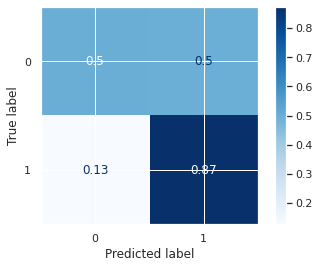

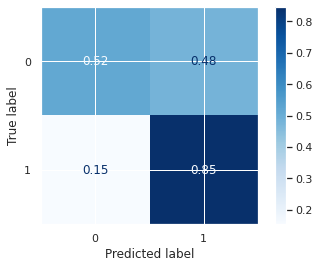

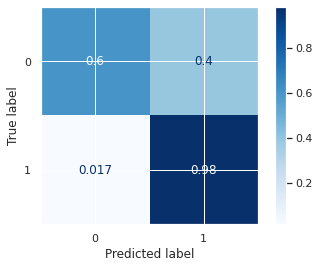

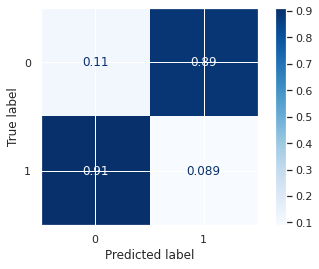

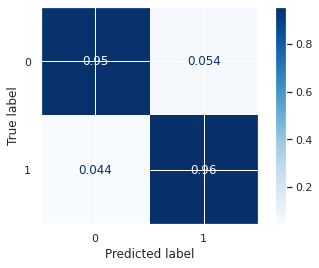

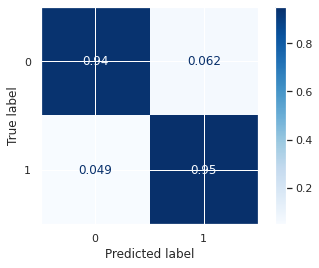

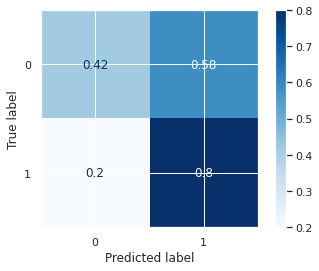

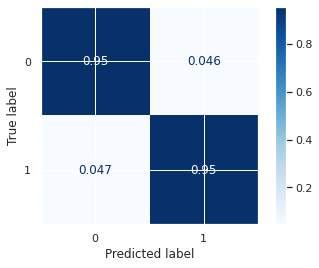

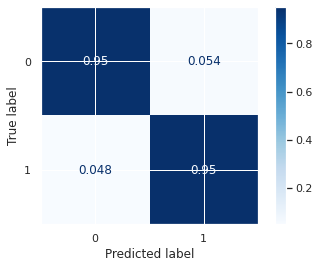

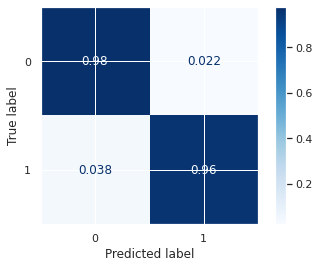

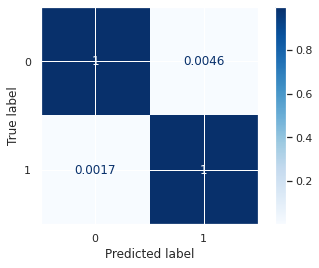

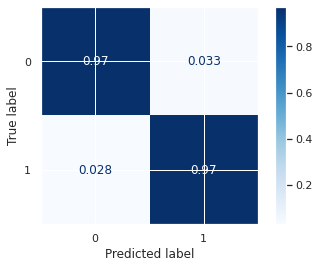

In [70]:
files = ['../labeled_dataset/GL53_UP_1A.csv','../labeled_dataset/GL53_UP_2A.csv','../labeled_dataset/GL53_UP_3A.csv','../labeled_dataset/GL55_DN_3A.csv',
        '../labeled_dataset/GL57_DN_3A.csv','../labeled_dataset/GL57_DN_2A.csv','../labeled_dataset/GL58_UP_1A.csv','../labeled_dataset/GL58_UP_2A.csv',
        '../labeled_dataset/GL58_UP_3A.csv','../labeled_dataset/GL59_DN_1A.csv','../labeled_dataset/GL59_DN_2A.csv','../labeled_dataset/GL59_DN_3A.csv']
#file = '../labeled_dataset/GL53_UP_3A.csv'
columns=['B530-H', 'B530-A','B675-H','B572-H','Width']

for file in files:
    
    X_file,y_file = preprocess(file,columns)

    y_pred_file = model.predict(X_file)
    metrics.plot_confusion_matrix(model, X_file, y_file, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');
    print("Accuracy: %.3f" % (metrics.accuracy_score(y_file, y_pred_file)))
    print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_file, y_pred_file)))
    print("F1: %.3f" % (metrics.f1_score(y_file, y_pred_file)))

### SVM

In [71]:
from sklearn import svm
svmsvc = svm.SVC(max_iter=1000, random_state=0)
svmsvc.fit(X_train, y_train)

SVC(max_iter=1000, random_state=0)

In [72]:
# Example of a cross-validation scenario 
results = model_selection.cross_val_score(svm.SVC(max_iter=1000, random_state=0), X, y, cv=kfold_cv, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(svm.SVC(max_iter=1000, random_state=0), X, y, cv=kfold_cv, scoring='balanced_accuracy')
print("Balanced Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(svm.SVC(max_iter=1000, random_state=0), X, y, cv=kfold_cv, scoring='f1')
print("F1: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(svm.SVC(max_iter=1000, random_state=0), X, y, cv=kfold_cv, scoring='roc_auc')
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

# Example for a training-test split
model = svm.SVC(max_iter=1000, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f" % (metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1: %.3f" % (metrics.f1_score(y_test, y_pred)))
print("AUC: %.3f" % (metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 1.000 (0.000)
Balanced Accuracy: 1.000 (0.000)
F1: 1.000 (0.000)
AUC: 1.000 (0.000)
Accuracy: 0.983
Balanced Accuracy: 0.978
F1: 0.974
AUC: 0.978


../labeled_dataset/GL53_UP_1A.csv
Accuracy: 0.652
Balanced Accuracy: 0.685
F1: 0.628
../labeled_dataset/GL53_UP_2A.csv
Accuracy: 0.671
Balanced Accuracy: 0.680
F1: 0.623
../labeled_dataset/GL53_UP_3A.csv
Accuracy: 0.776
Balanced Accuracy: 0.793
F1: 0.745
../labeled_dataset/GL55_DN_3A.csv
Accuracy: 0.126
Balanced Accuracy: 0.103
F1: 0.223
../labeled_dataset/GL57_DN_3A.csv
Accuracy: 0.958
Balanced Accuracy: 0.956
F1: 0.938
../labeled_dataset/GL57_DN_2A.csv
Accuracy: 0.956
Balanced Accuracy: 0.956
F1: 0.951
../labeled_dataset/GL58_UP_1A.csv
Accuracy: 0.568
Balanced Accuracy: 0.607
F1: 0.533
../labeled_dataset/GL58_UP_2A.csv
Accuracy: 0.964
Balanced Accuracy: 0.965
F1: 0.950
../labeled_dataset/GL58_UP_3A.csv
Accuracy: 0.960
Balanced Accuracy: 0.959
F1: 0.939
../labeled_dataset/GL59_DN_1A.csv
Accuracy: 0.970
Balanced Accuracy: 0.972
F1: 0.960
../labeled_dataset/GL59_DN_2A.csv
Accuracy: 0.985
Balanced Accuracy: 0.982
F1: 0.978
../labeled_dataset/GL59_DN_3A.csv
Accuracy: 0.972
Balanced Accura

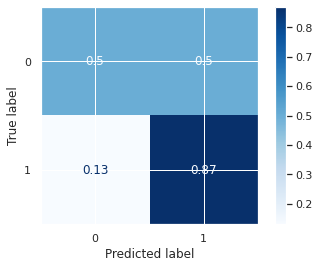

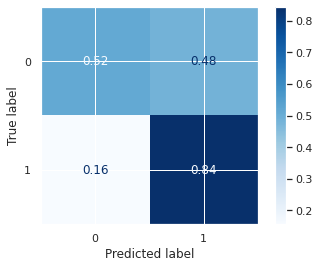

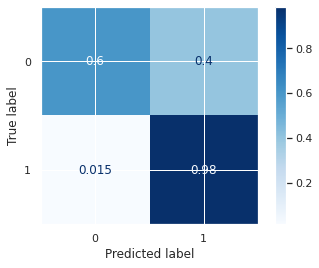

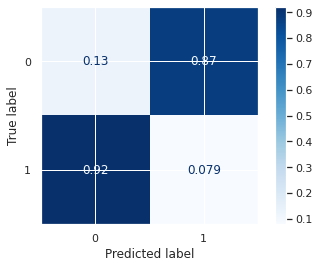

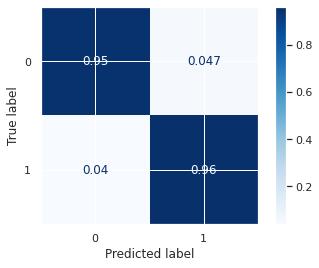

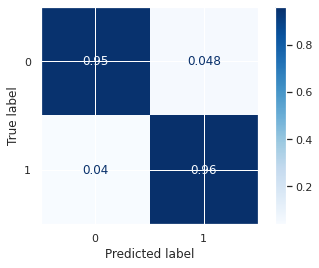

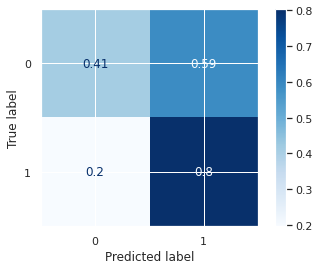

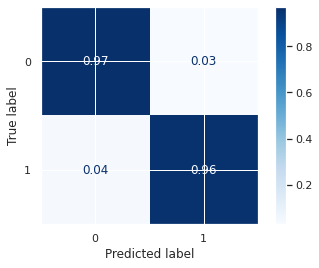

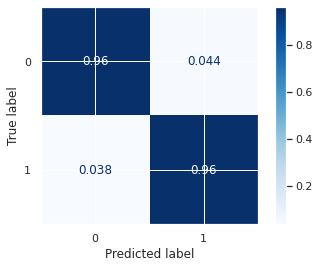

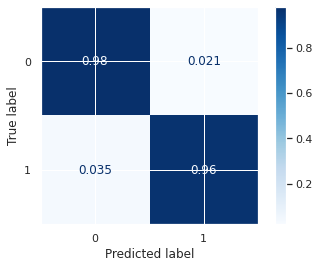

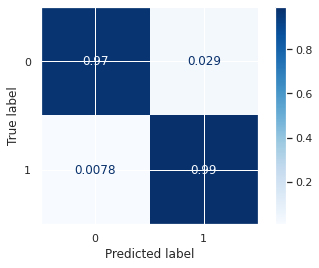

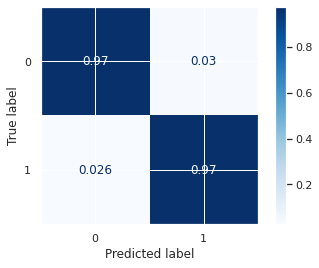

In [73]:
files = ['../labeled_dataset/GL53_UP_1A.csv','../labeled_dataset/GL53_UP_2A.csv','../labeled_dataset/GL53_UP_3A.csv','../labeled_dataset/GL55_DN_3A.csv',
        '../labeled_dataset/GL57_DN_3A.csv','../labeled_dataset/GL57_DN_2A.csv','../labeled_dataset/GL58_UP_1A.csv','../labeled_dataset/GL58_UP_2A.csv',
        '../labeled_dataset/GL58_UP_3A.csv','../labeled_dataset/GL59_DN_1A.csv','../labeled_dataset/GL59_DN_2A.csv','../labeled_dataset/GL59_DN_3A.csv']
#file = '../labeled_dataset/GL53_UP_3A.csv'
columns=['B530-H', 'B530-A','B675-H','B572-H','Width']

for file in files:
    
    X_file,y_file = preprocess(file,columns)

    y_pred_file = model.predict(X_file)
    metrics.plot_confusion_matrix(model, X_file, y_file, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');
    print("Accuracy: %.3f" % (metrics.accuracy_score(y_file, y_pred_file)))
    print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_file, y_pred_file)))
    print("F1: %.3f" % (metrics.f1_score(y_file, y_pred_file)))

<AxesSubplot:xlabel='B530-H', ylabel='B572-H'>

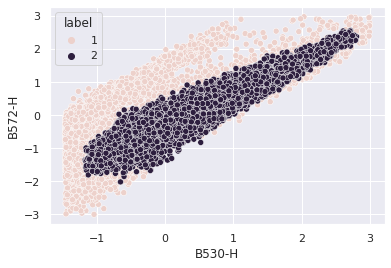

In [74]:
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y)